<a href="https://colab.research.google.com/github/Khamaldeeen/Hamoye-DS-Internship/blob/master/Hamoye_Machine_Learning_Energy_StageB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#dropping columns not required
df.drop(['date', 'lights'], axis=1, inplace=True)

In [4]:
#normalizing dataset using the mixmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalDf = pd.DataFrame( scaler.fit_transform(df), columns = df.columns)

In [5]:
normalDf.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [9]:
#Using T2 and T6 as independent and dependent variable to train linear model
x = df['T2']
y = df['T6']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_error

#Splitting x and y into train and test using random state 42 and 30% test set
x_train, x_test, y_train, y_test = train_test_split(np.array(x), y, test_size = 0.3, random_state=42)

#Initialize linear model regression class
lr = LinearRegression()

#fit the x_train and y_train
lr.fit(x_train.reshape(-1, 1), y_train)
ypred = lr.predict(x_test.reshape(-1, 1))

In [11]:

#Evaluating model performance
#r2Score
r2 = r2_score(y_test, ypred)
print(round(r2, 2), "R2 Score")

#mean absoute error
mae = mean_absolute_error(y_test, ypred)
print(round(mae, 2), "Mean Absolute Error")

#Residual Sum Squared
rss = np.sum(np.square(y_test - ypred))
print(round(rss, 2), "Residual Sum Squared")

#Root mean square
rms = np.sqrt(mean_squared_error(y_test, ypred))
print(round(rms, 3), "Root Mean Squared")

0.64 R2 Score
2.82 Mean Absolute Error
78033.97 Residual Sum Squared
3.63 Root Mean Squared


#Evaluating Performance using Ridge and Lasso regression models

In [13]:
from sklearn.linear_model import Ridge, Lasso
rg = Ridge(alpha=0.4)
ls = Lasso(alpha=0.001)

#fitting the train and test set on the ridge and lasso regression models
rg.fit(x_train.reshape(-1, 1), y_train)
ls.fit(x_train.reshape(-1, 1), y_train)

rgpred = rg.predict(x_test.reshape(-1, 1))
lspred = ls.predict(x_test.reshape(-1, 1))

In [14]:
#Evaluating model performance
#r2Score
r2 = r2_score(y_test, rgpred)
print(round(r2, 2), "R2 Score Ridge")

r2 = r2_score(y_test, lspred)
print(round(r2, 2), "R2 Score Lasso")

#mean absoute error
mae = mean_absolute_error(y_test, rgpred)
print(round(mae, 2), "Mean Absolute Error Ridge")

mae = mean_absolute_error(y_test, lspred)
print(round(mae, 2), "Mean Absolute Error Lasso")

#Residual Sum Squared
rss = np.sum(np.square(y_test - rgpred))
print(round(rss, 2), "Residual Sum Squared Ridge")

rss = np.sum(np.square(y_test - lspred))
print(round(rss, 2), "Residual Sum Squared Lasso")

#Root mean square
rms = np.sqrt(mean_squared_error(y_test, rgpred))
print(round(rms, 3), "Root Mean Squared Ridge")

rms = np.sqrt(mean_squared_error(y_test, lspred))
print(round(rms, 3), "Root Mean Squared Lasso")

0.64 R2 Score Ridge
0.64 R2 Score Lasso
2.82 Mean Absolute Error Ridge
2.82 Mean Absolute Error Lasso
78033.97 Residual Sum Squared Ridge
78033.96 Residual Sum Squared Lasso
3.63 Root Mean Squared Ridge
3.63 Root Mean Squared Lasso


In [16]:
#Splitting whole dataset into X and Y predictors and dependent variable
x_data = normalDf.drop(['Appliances'], axis=1)
y_data = normalDf['Appliances']

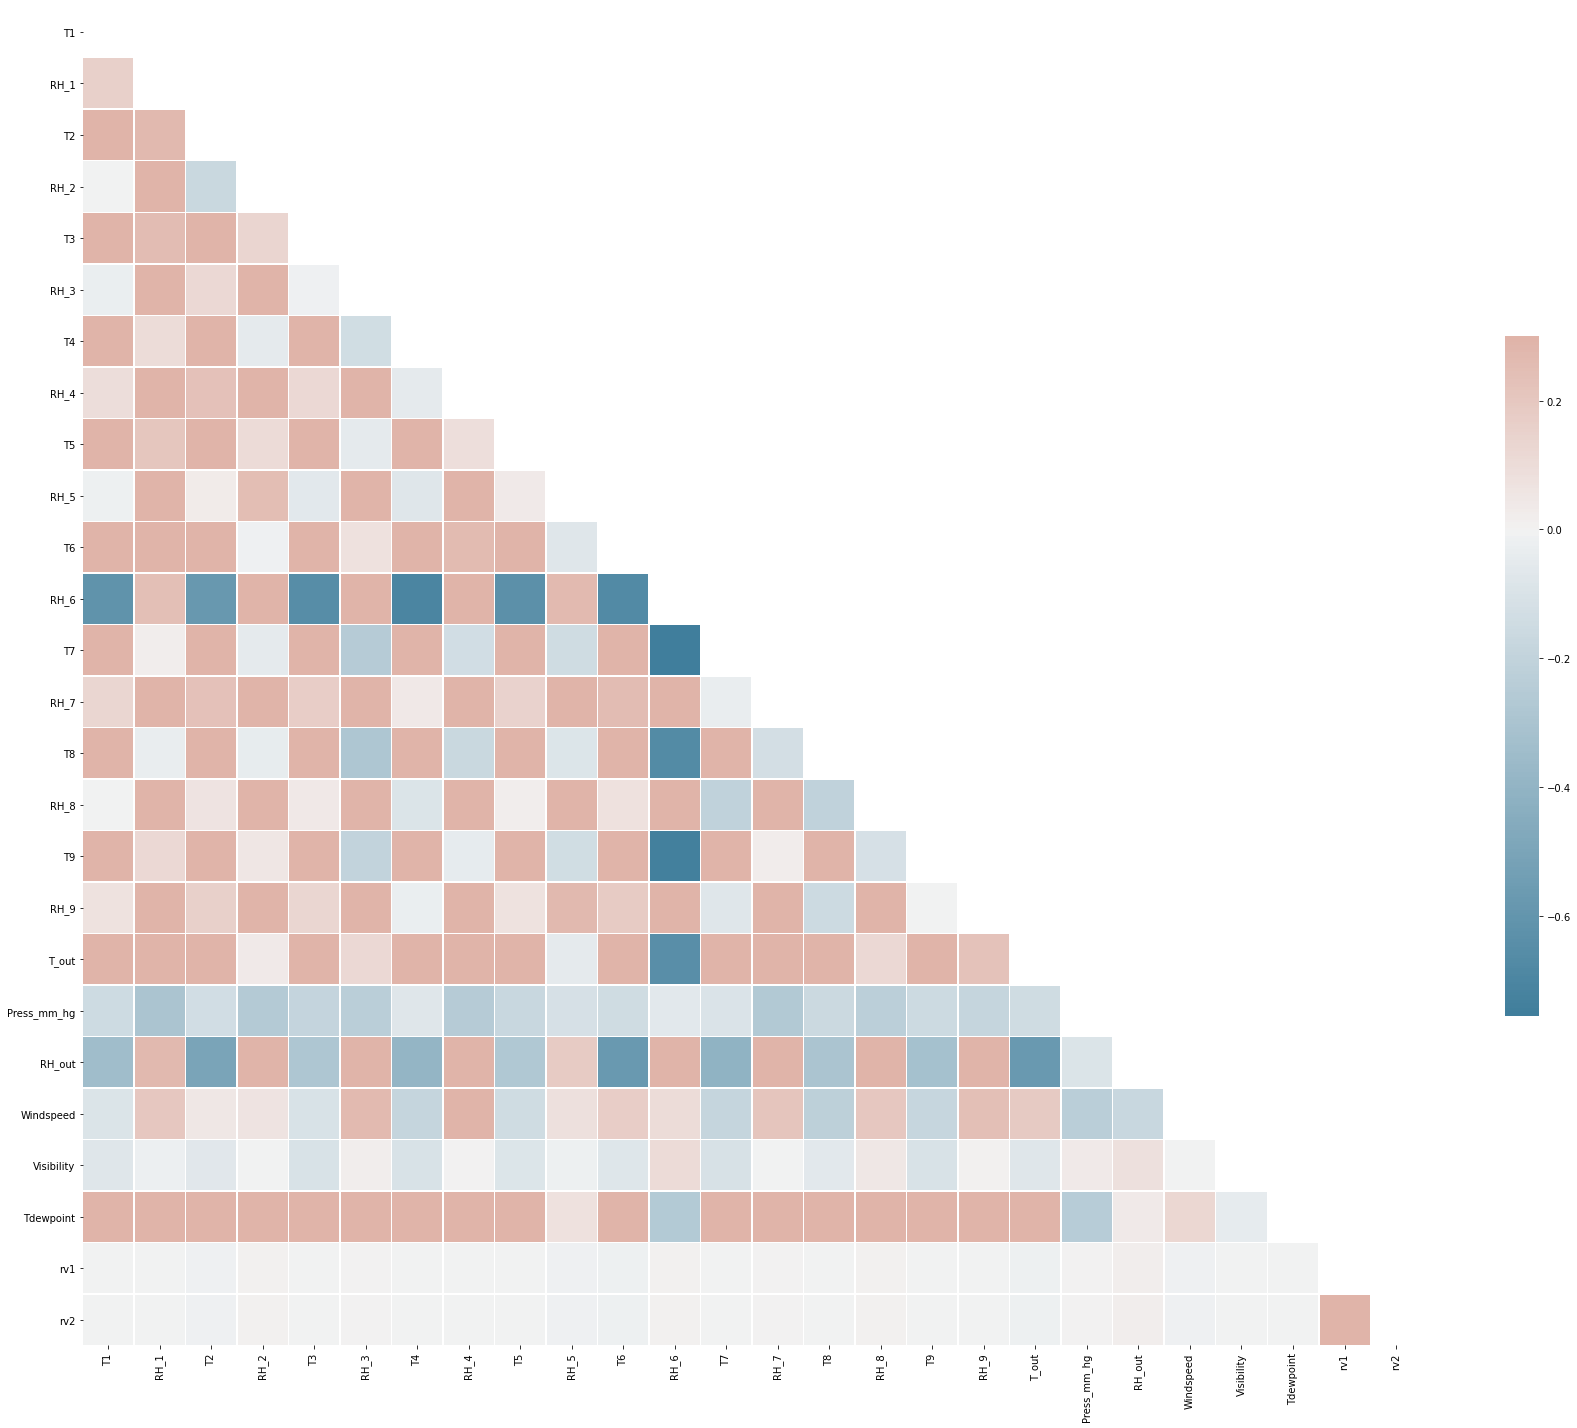

In [17]:
corr = x_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30,25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
#evaluating variance inflation factor for colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
vif_table = pd.DataFrame()
vif_table['features'] = x_data.columns 
vif_table['VIF'] = [variance_inflation_factor(x_data.values, i) for i in range(len(x_data.columns))]
vif_table

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,T1,200.522791
1,RH_1,190.514267
2,T2,131.185557
3,RH_2,498.046060
4,T3,73.809400
5,RH_3,122.773963
6,T4,79.648921
7,RH_4,130.373077
8,T5,64.839372
9,RH_5,8.810896


In [42]:
#x_data_gb = x_data[["Visibility", "Windspeed", "RH_5"]]
#x_data_rm = x_data.drop(["T1", "RH_3", "RH_4", "RH_1", "T6", "T7", "T3", "T4", "T5", "T8", "RH_9", "T9", "RH_out"], axis=1)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data.values, y_data, test_size=0.3, random_state= 42 )

In [47]:
lmodel = LinearRegression()
lmodel.fit(X_train, Y_train)
allpred = lmodel.predict(X_test)

In [48]:
r2_score(Y_test, allpred)

0.14890246319303535

In [49]:
#mean absoute error
mae = mean_absolute_error(Y_test, allpred)
print(round(mae, 2), "Mean Absolute Error")

#Residual Sum Squared
rss = np.sum(np.square(Y_test - allpred))
print(round(rss, 2), "Residual Sum Squared")

#Root mean square
rms = np.sqrt(mean_squared_error(Y_test, allpred))
print(round(rms, 3), "Root Mean Squared")

0.05 Mean Absolute Error
45.35 Residual Sum Squared
0.088 Root Mean Squared
